In [1]:
import numpy as np
from ctypes import *
import matplotlib.pyplot as plt
%matplotlib notebook
from andorsdk.pyandor import Andor

cam = Andor()
dll = cdll.LoadLibrary("C:\\Program Files\\Andor iXon\\Drivers\\atmcd64d")

In [2]:
# Initializing the camera
messageInitialize = cam.Initialize()
if messageInitialize is not None:
    print(messageInitialize)

In [3]:
# Setting the initial settings for the camera
cam.SetShutter(1, 2, 0, 0)
cam.SetReadMode(2)

RandomTrackposition = np.array([165, 198, 211, 244])

cam.SetRandomTracks(2, RandomTrackposition)
cam.GetNumberADChannels()
cam.SetADChannel(1)
cam.SetTriggerMode(0)
cam.GetDetector()
cam.SetHSSpeed(1, 0)
cam.SetVSSpeed(3)

In [10]:
# Setting up settings for a single scan
cam.SetAcquisitionMode(1)
cam.SetShutter(1, 1, 0, 0)

def getdata():
    dim = 512 * 2
    imagearray = c_int * dim
    cimage = imagearray()

    messageGetData = dll.GetAcquiredData(pointer(cimage), dim)
    if messageGetData is not None:
        print(messageGetData)
    
    return cimage

In [46]:
# Taking a single scan
cam.StartAcquisition()
messageGetStatus = cam.GetStatus()
if messageGetStatus is not None:
    print(messageGetStatus)

DRV_ACQUIRING


In [47]:
# Checking to see if scan has completed
messageGetStatus = cam.GetStatus()
if messageGetStatus is not None:
    print(messageGetStatus)

DRV_IDLE


20002


<IPython.core.display.Javascript object>


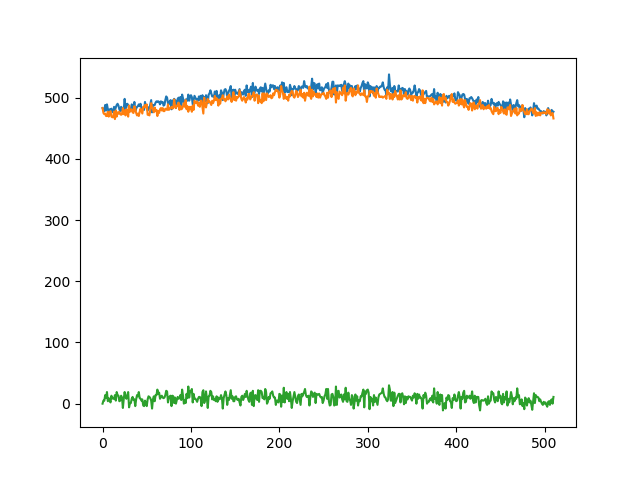

In [48]:
# Getting data and plotting it
cimage = getdata()
image = cimage[:]
# imagenp = np.asarray(image, dtype=np.uint16)
imagenp = np.asarray(image)

track1 = imagenp[0:511]
track2 = imagenp[512:1023]
trackdiff = np.subtract(track1, track2)

plt.figure()
plt.plot(track1)
plt.plot(track2)
plt.plot(trackdiff)
plt.show()

In [50]:
# Shutting down the camera
messageShutdown = cam.ShutDown()
if messageShutdown is not None:
    print(messageShutdown)